# First AI application using Transfer Learning in 6 Steps!

<img src='images/12/ai_6steps.png'>

## Download the dataset 
- Download the cats vs dogs dataset from this link and unzip the file: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

## Download the pre-trained model

In [1]:
# Import the necessary package
from tensorflow.keras.applications import MobileNetV2

In [2]:
# Import the desired pre-trained model
# List of pre-trained models: https://www.tensorflow.org/api_docs/python/tf/keras/applications
pre_trained_model = MobileNetV2(include_top=False, pooling='avg')

In [3]:
# Freeze the model so we don't accidentally change the pre-trained model
pre_trained_model.trainable = False

## Load the downloaded dataset into Python

In [4]:
# Import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os

In [5]:
# Data from Train folder
train_data_location = os.path.join('..','data', 'cats_and_dogs_filtered', 'train')
train_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_data_location, 
                                                                                             target_size=(224,224))

# Data from Validation folder
validation_data_location = os.path.join('..','data', 'cats_and_dogs_filtered', 'validation')
validation_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(validation_data_location, 
                                                                                                  target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Check the output mappings
class_mappings = train_data.class_indices
print(f'The class mappings are {class_mappings}')

The class mappings are {'cats': 0, 'dogs': 1}


## Load and Modify the pre-trained model to suit our dataset

In [7]:
# Import the necessary packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(Dense(len(class_mappings), activation='softmax'))

In [9]:
# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# If you want to check the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


## Training the model on your dataset

In [11]:
# Train the model for 5 rounds. Each round is called an "epoch"
training_history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
63/63 [==============================] - 10s 160ms/step - loss: 0.1958 - accuracy: 0.9240 - val_loss: 0.0554 - val_accuracy: 0.9850
Epoch 2/5
63/63 [==============================] - 8s 128ms/step - loss: 0.0531 - accuracy: 0.9820 - val_loss: 0.0522 - val_accuracy: 0.9840
Epoch 3/5
63/63 [==============================] - 8s 130ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0381 - val_accuracy: 0.9880
Epoch 4/5
63/63 [==============================] - 8s 126ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 5/5
63/63 [==============================] - 8s 126ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0487 - val_accuracy: 0.9830


In [12]:
# Save the trained model to a file for future use
model.save(os.path.join('..', 'models', 'cats_vs_dogs.h5'))

### Plotting the training losses

In [13]:
# Import the necessary package
import matplotlib.pyplot as plt

# Custom function
def plot_training_loss(training_history):
    # Plot the Training and Validation losses over each epoch
    plt.plot(training_history.history['loss'], label='training loss')
    plt.plot(training_history.history['val_loss'], label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
# Custom function
def plot_training_accuracy(training_history):
    # Plot the Training and Validation losses over each epoch
    plt.plot(training_history.history['accuracy'], label='training accuracy')
    plt.plot(training_history.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

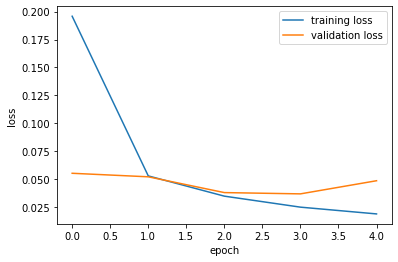

In [14]:
# Plot the Training and Validation losses over each epoch
plot_training_loss(training_history)

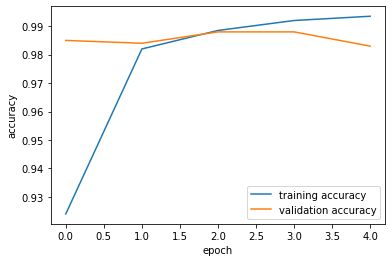

In [15]:
# Plot the Training and Validation losses over each epoch
plot_training_accuracy(training_history)

## Using the model for predictions

In [16]:
# Import the necessary packages
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import os

In [17]:
# Load the model file into Python
model = load_model(os.path.join('..', 'models', 'cats_vs_dogs.h5'))

In [18]:
# Load the image into Python
test_image = image.load_img(os.path.join('images', 'test', 'test1.jpg'))

# Convert the image to a matrix of numbers
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

In [19]:
# Make predictions
result = model.predict(test_image)
print(result)

[[3.2136013e-06 9.9999678e-01]]


In [20]:
# Convert the number predictions to the actual name. The class mappings are {'cats': 0, 'dogs': 1}.
# The model predictions are actually the probability of the image belonging to each class.

# To find the element with the highest value, we use numpy's argmax function
predicted_class = np.argmax(result)

if predicted_class == 0:
    print('Cat')
elif predicted_class == 1:
    print('Dog')

Dog


## Keras Callbacks - Early Stopping
- If you want training to stop when some metric stops improving (eg. validation loss), you can use the Early Stopping callback to do so.
- This helps to stop the training before all your epochs have completed, thus speeding up training process. 
- However, the model reaches could be sub-optimal. Thus is you are not achieving your desired accuracy, please remove Early Stopping and run for more Epochs

In [21]:
# Import the necessary packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# To create a model for our needs, first create a blank model
model = Sequential()

# Then add the pre-trained model to use Transfer Learning
model.add(pre_trained_model)

# Finally add our custom modifications
model.add(Dense(len(class_mappings), activation='softmax'))

# Make the model ready for training
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Create a custom callbacks list consisting of Early Stopping callback
custom_callbacks = [EarlyStopping(patience=3)]

In [24]:
# Train the model for 15 rounds. Each round is called an "epoch"
training_history = model.fit(train_data, epochs=15, validation_data=validation_data, callbacks=custom_callbacks)

Epoch 1/15
63/63 [==============================] - 11s 168ms/step - loss: 0.1308 - accuracy: 0.9550 - val_loss: 0.0743 - val_accuracy: 0.9790
Epoch 2/15
63/63 [==============================] - 8s 127ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0483 - val_accuracy: 0.9850
Epoch 3/15
63/63 [==============================] - 8s 126ms/step - loss: 0.0370 - accuracy: 0.9875 - val_loss: 0.0467 - val_accuracy: 0.9840
Epoch 4/15
63/63 [==============================] - 8s 128ms/step - loss: 0.0275 - accuracy: 0.9930 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 5/15
63/63 [==============================] - 8s 127ms/step - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0533 - val_accuracy: 0.9830
Epoch 6/15
63/63 [==============================] - 8s 128ms/step - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.0653 - val_accuracy: 0.9810


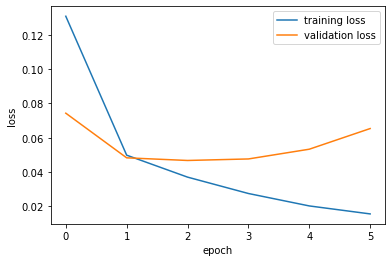

In [25]:
plot_training_loss(training_history)

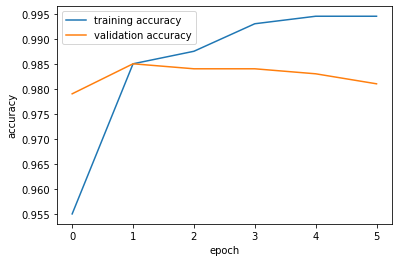

In [26]:
plot_training_accuracy(training_history)